# EDA de Accidentes Aviones



### Librerías y Carga de Datos:



In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import re

In [105]:
import warnings
# Configura las advertencias para que se ignoren
warnings.filterwarnings('ignore')

In [106]:
df_avion=pd.read_csv('./AccidentesAviones.csv')

### Visualizar las primeras filas de los datos

Vemos que la primer columna es igual al indice y que los nulos se muestran como '?'

In [107]:
# Visualizar las primeras filas de los datos
df_avion.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


# Información sobre las columnas

solo la primer columna es mostrada como int64, y al ser '?' los nulos no los muestra como es debido

In [108]:
df_avion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

# Columna igual al index

In [109]:
son_iguales = df_avion.index == df_avion.iloc[:,0]

In [110]:
son_iguales.sum()

5008

In [111]:
df_avion.shape[0]

5008

Quito la columna que tiene los mismos valores que el index

In [112]:
# Elimino la primera columna
df_avion = df_avion.iloc[:, 1:]

In [113]:
df_avion.head(2)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


Guardo el dataset para continuar

In [114]:
nombreCSV = 'AccidentesAvionesModificado.csv'
df_avion.to_csv(nombreCSV, index=False)

In [115]:
df_avion=pd.read_csv('./AccidentesAvionesModificado.csv')

In [116]:
df_avion.head(2)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


# Fechas a datetime

cambio el tipo de dato de las fechas y horas. Tambien reemplazo las horas que contienen algun tipo de string

In [117]:
# Convierte la columna 'fecha' a objetos datetime sin la hora y en formato "día-mes-año"
df_avion['fecha'] = pd.to_datetime(df_avion['fecha'], format='%B %d, %Y', errors='coerce').dt.strftime('%d-%m-%Y')

In [118]:
# Función para limpiar la hora
def limpiar_hora(hora):
    # Utiliza una expresión regular para encontrar y reemplazar todos los caracteres no numéricos
    hora_limpia = re.sub(r'[^0-9]', '', hora)
    return hora_limpia

# Aplica la función limpiar_hora a la columna "HORA declarada"
df_avion['HORA declarada'] = df_avion['HORA declarada'].apply(limpiar_hora)

In [119]:
df_avion['HORA declarada'] = df_avion['HORA declarada'].astype(str)
# Agrega el argumento errors='coerce' para que los valores nulos se conviertan en NaT (valores de tiempo nulo)
df_avion['HORA declarada'] = pd.to_datetime(df_avion['HORA declarada'], format='%H%M', errors='coerce').dt.time

In [120]:
df_avion.head(2)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,17-09-1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,07-09-1909,NaT,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


# Valores vacios o faltantes

Miro los valores vacios de el df

In [121]:
for column in df_avion:
    if df_avion[column].dtype != 'object':  # Verifica si la columna no es de tipo objeto (cadena)
        continue  # Salta la columna si no es una cadena
    vacios = df_avion[column].astype(str).str.count(r'^\?$').sum()
    print(f'col:{column}, ?:{vacios}')

col:fecha, ?:0
col:HORA declarada, ?:0
col:Ruta, ?:5
col:OperadOR, ?:10
col:flight_no, ?:3682
col:route, ?:762
col:ac_type, ?:13
col:registration, ?:272
col:cn_ln, ?:667
col:all_aboard, ?:17
col:PASAJEROS A BORDO, ?:221
col:crew_aboard, ?:219
col:cantidad de fallecidos, ?:8
col:passenger_fatalities, ?:235
col:crew_fatalities, ?:235
col:ground, ?:44
col:summary, ?:59


remplazo los ? con NaN

In [122]:
for column in df_avion:
    if df_avion[column].dtype != 'object':  # Verifica si la columna no es de tipo objeto (cadena)
        continue  # Salta la columna si no es una cadena
    df_avion[column] = df_avion[column].replace('?', np.nan)

In [123]:
for column in df_avion:
    if df_avion[column].dtype != 'object':  # Verifica si la columna no es de tipo objeto (cadena)
        continue  # Salta la columna si no es una cadena
    vacios = df_avion[column].isna().sum()
    print(f'col:{column}, NaN:{vacios}')

col:fecha, NaN:0
col:HORA declarada, NaN:1504
col:Ruta, NaN:5
col:OperadOR, NaN:10
col:flight_no, NaN:3682
col:route, NaN:762
col:ac_type, NaN:13
col:registration, NaN:272
col:cn_ln, NaN:667
col:all_aboard, NaN:17
col:PASAJEROS A BORDO, NaN:221
col:crew_aboard, NaN:219
col:cantidad de fallecidos, NaN:8
col:passenger_fatalities, NaN:235
col:crew_fatalities, NaN:235
col:ground, NaN:44
col:summary, NaN:59


# Guardar nuevo df como csv

In [124]:
nombreCSV = 'AccidentesAvionesModificado.csv'
df_avion.to_csv(nombreCSV, index=False)

In [125]:
df_avion=pd.read_csv('./AccidentesAvionesModificado.csv')

In [126]:
df_avion.head(2)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,17-09-1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07-09-1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


## Cambio el nombre de las columnas a nombres en español

In [127]:
column_names = [
    "Fecha", "Hora Declarada", "Ruta", "Operador", "Num de Vuelo", "Tipo de Vuelo", "Tipo de Aeronave", "Matricula", "CN/LN", "Total a Bordo", "Pasajeros a Bordo", "Tripulacion a Bordo", "Cantidad de Fallecidos", "Pasajeros Fallecidos", "Tripulacion Fallecida", "Fallecidos en Tierra", "Resumen"
]
df_avion.columns = column_names

In [128]:
df_avion.head(2)

,Fecha,Hora Declarada,Ruta,Operador,Num de Vuelo,Tipo de Vuelo,Tipo de Aeronave,Matricula,CN/LN,Total a Bordo,Pasajeros a Bordo,Tripulacion a Bordo,Cantidad de Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidos en Tierra,Resumen
0,17-09-1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07-09-1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


quito la columna de Num de Vuelo que tiene un 74% de sus valores faltantes

In [129]:
df_avion=df_avion.drop(['Num de Vuelo'],axis=1)

Vemos que en nuestros datos de pasajeros a bordo hay veces en que la cantidad de personas a bordo es menor a la suma de la cantidad de pasajeros y tripulantes en el vehiculo

In [130]:
def corregir_total_a_bordo(dataframe):
    # Verificar si la suma de "Pasajeros a Bordo" y "Tripulación a Bordo" es mayor que "Total a Bordo"
    mask = (dataframe['Pasajeros a Bordo'] + dataframe['Tripulacion a Bordo']) > dataframe['Total a Bordo']
    
    # Actualizar los valores de "Total a Bordo" donde se cumple la condición
    dataframe.loc[mask, 'Total a Bordo'] = dataframe.loc[mask, 'Pasajeros a Bordo'] + dataframe.loc[mask, 'Tripulacion a Bordo']

corregir_total_a_bordo(df_avion)

Vemos que en nuestros datos de Fallecidos hay veces en que la Cantidad de Fallecidos es menor a la suma Pasajeros Fallecidos y Tripulacion Fallecida

In [131]:
def corregir_Tripulacion_Fallecida(dataframe):
    # Verificar si la suma de 'Tripulacion Fallecida' y'Pasajeros Fallecidos' es mayor que "Total a Bordo"
    mask = (dataframe['Tripulacion Fallecida'] + dataframe['Pasajeros Fallecidos']) > dataframe['Cantidad de Fallecidos']
    
    # Actualizar los valores de "Cantidad de Fallecidos" donde se cumple la condición
    dataframe.loc[mask, 'Cantidad de Fallecidos'] = dataframe.loc[mask, 'Tripulacion Fallecida'] + dataframe.loc[mask, 'Pasajeros Fallecidos']

corregir_Tripulacion_Fallecida(df_avion)

Elimino las filas que tienen todos sus valores de personas a bordo y fallecidos faltantes

In [132]:
columnas_a_verificar = ['Total a Bordo', 'Pasajeros a Bordo', 'Tripulacion a Bordo', 'Cantidad de Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida']
# Elimina filas que tienen NaN en TODAS las columnas especificadas.
df_avion = df_avion.dropna(subset=columnas_a_verificar, how='all')

## columna de categoria militar/comercial

Creo una columna nueva que contenga la categoria de la aeronave

In [134]:
# Crea la nueva columna 'categoria' basada en la columna 'Operador'
df_avion['categoria'] = df_avion['Operador'].apply(lambda x: 'Militar' if 'Military' in x else 'Comercial')

In [135]:
df_avion.head(2)

,Fecha,Hora Declarada,Ruta,Operador,Tipo de Vuelo,Tipo de Aeronave,Matricula,CN/LN,Total a Bordo,Pasajeros a Bordo,Tripulacion a Bordo,Cantidad de Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidos en Tierra,Resumen,categoria
0,17-09-1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Militar
1,07-09-1909,NaN,"Juvisy-sur-Orge, France",nan,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,Comercial


In [92]:
nombreCSV = 'AccidentesAvionesModificado.csv'
df_avion.to_csv(nombreCSV, index=False)

# Empezando el EDA

In [93]:
df_avion=pd.read_csv('./AccidentesAvionesModificado.csv')

Vemos que tenemos un total de 5008 filas y 17 columnas

In [94]:
df_avion.shape

(5000, 16)

In [95]:
df_avion.head()

,Fecha,Hora Declarada,Ruta,Operador,Tipo de Vuelo,Tipo de Aeronave,Matricula,CN/LN,Total a Bordo,Pasajeros a Bordo,Tripulacion a Bordo,Cantidad de Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidos en Tierra,Resumen
0,17-09-1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07-09-1909,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,12-07-1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,06-08-1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09-09-1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


Podemos ver que la unica columna sin nulos es la columna de fecha
La columna con más nulos es la de numero de vuelo

Tambien podemos ver que tenemos 7 columnas numéricas.

In [96]:
df_avion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   5000 non-null   object 
 1   Hora Declarada          3504 non-null   object 
 2   Ruta                    4995 non-null   object 
 3   Operador                4990 non-null   object 
 4   Tipo de Vuelo           4245 non-null   object 
 5   Tipo de Aeronave        4989 non-null   object 
 6   Matricula               4731 non-null   object 
 7   CN/LN                   4341 non-null   object 
 8   Total a Bordo           4991 non-null   float64
 9   Pasajeros a Bordo       4787 non-null   float64
 10  Tripulacion a Bordo     4789 non-null   float64
 11  Cantidad de Fallecidos  5000 non-null   float64
 12  Pasajeros Fallecidos    4773 non-null   float64
 13  Tripulacion Fallecida   4773 non-null   float64
 14  Fallecidos en Tierra    4964 non-null   

# Estadísticas descriptivas básicas

**Pasajeros y Tripulación:** Podemos ver una media de 31 personas a bordo de la Aeronave. Esto incluye tanto pasajeros como tripulación. El 75% de los accidentes tenía 35 personas o menos a bordo, lo que sugiere que la mayoría de los accidentes involucran aeronaves más pequeñas o situaciones con menos ocupantes.

**Fallecidos**: En promedio, hubo alrededor de 22 fallecidos en cada accidente. Esto incluye tanto pasajeros como tripulación. El 50% de los accidentes tenía 11 fallecidos o menos. Los valores máximos son significativamente más altos.

**Fallecidos en Tierra**: La columna "Fallecidos en Tierra" tiene un valor máximo extremadamente alto de 2,750

**Valores Faltantes**: Hay valores faltantes en las columnas relacionadas con la cantidad de pasajeros y tripulación a bordo. Esto podría indicar que en algunos registros no se registraron estas cifras o que la información está incompleta.

In [97]:
df_avion.describe()

,Total a Bordo,Pasajeros a Bordo,Tripulacion a Bordo,Cantidad de Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidos en Tierra
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000
mean,31.138449,26.877376,4.519524,22.368600,18.940708,3.587262,1.718372
std,45.491146,44.035342,3.758072,35.128796,34.065190,3.177315,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [98]:
df_avion.describe(include=['O'])

,Fecha,Hora Declarada,Ruta,Operador,Tipo de Vuelo,Tipo de Aeronave,Matricula,CN/LN,Resumen
count,5000,3504,4995,4990,4245,4989,4731,4341,4945
unique,4571,1060,4118,2267,3838,2465,4695,3907,4854
top,31-08-1988,15:00:00,"Moscow, Russia",Aeroflot,Training,Douglas DC-3,49,1,Crashed under unknown circumstances.
freq,4,38,16,253,96,333,3,8,9


# Matriz de correlación

Vemos que hay una relación directa entre  los Pasajeros a Bordo y el Total a bordo, así como una relación directa entre Cantidad de Fallecidos y Pasajeros Fallecidos

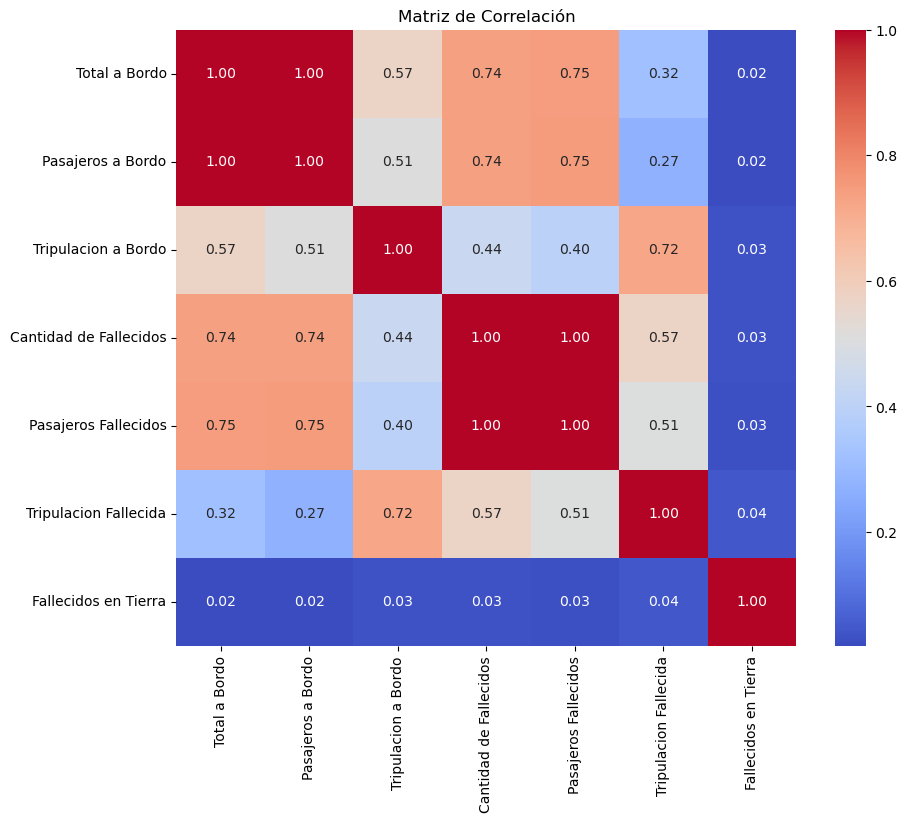

In [99]:
# Calcular la matriz de correlación
correlation_matrix = df_avion.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# histogramas con las variables númericas

podemos ver que en la mayoria de los accidentes ocurrieron con menos de 20 personas a bordo de la aeronave

<Figure size 1200x800 with 0 Axes>

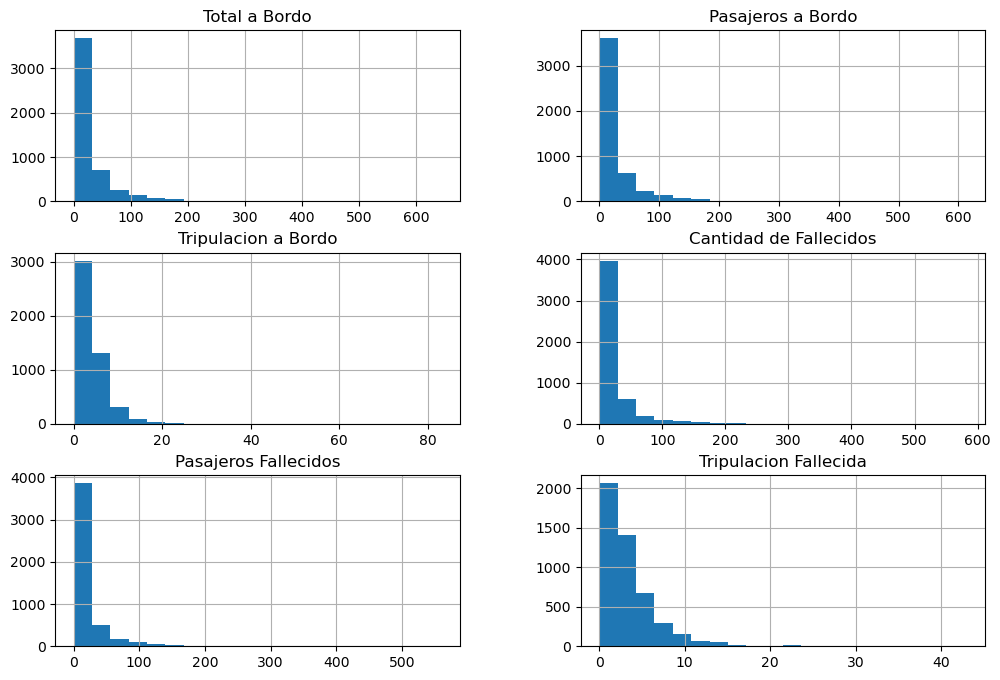

In [101]:
#histogramas
plt.figure(figsize=(12, 8))
df_avion.hist(column=['Total a Bordo', 'Pasajeros a Bordo', 'Tripulacion a Bordo', 'Cantidad de Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida'], bins=20, figsize=(12, 8))
plt.show()

Se observa una relación interesante entre la cantidad de fallecidos y el total de personas a bordo. Los vuelos con un número limitado de personas mostraron una variabilidad en la cantidad de fallecidos, mientras que en vuelos con una mayor cantidad de personas, se observaron casos extremos, con algunos vuelos sin sobrevivientes y otros con una tasa de supervivencia cercana al 100%

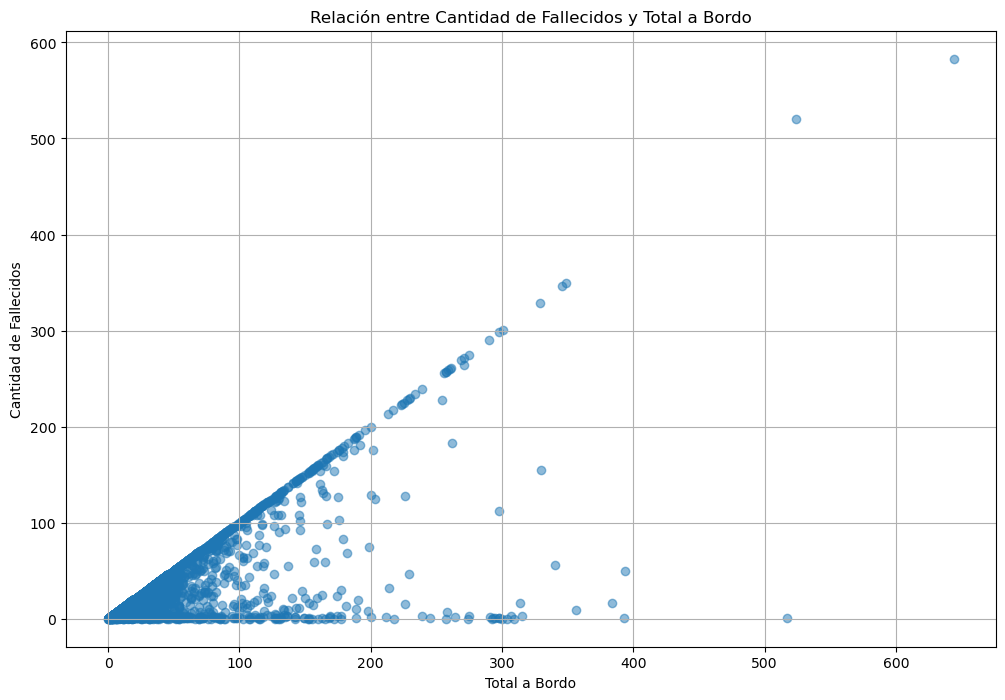

In [39]:
plt.figure(figsize=(12, 8))
plt.scatter(df_avion['Total a Bordo'], df_avion['Cantidad de Fallecidos'], alpha=0.5)
plt.xlabel('Total a Bordo')
plt.ylabel('Cantidad de Fallecidos')
plt.title('Relación entre Cantidad de Fallecidos y Total a Bordo')
plt.grid(True)
plt.show()


vemos que en la gran mayoria de los accidentes no hay fallecidos en tierra

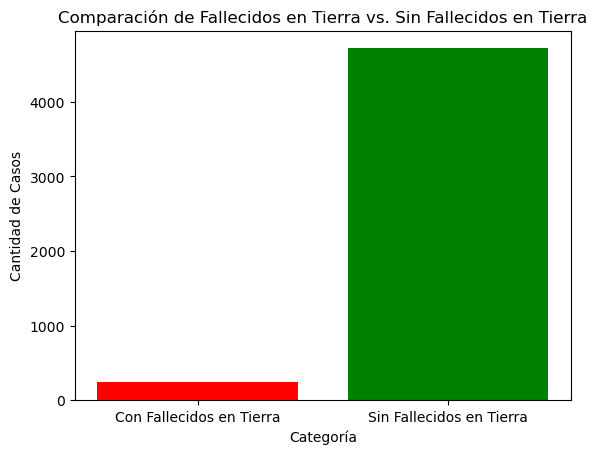

In [40]:
# Contar la cantidad de casos con fallecidos en tierra y sin fallecidos en tierra
casos_con_fallecidos_en_tierra = df_avion[df_avion['Fallecidos en Tierra'] > 0]
casos_sin_fallecidos_en_tierra = df_avion[df_avion['Fallecidos en Tierra'] == 0]

# Crear un gráfico de barras para comparar
plt.bar(['Con Fallecidos en Tierra', 'Sin Fallecidos en Tierra'], [len(casos_con_fallecidos_en_tierra), len(casos_sin_fallecidos_en_tierra)], color=['red', 'green'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Casos')
plt.title('Comparación de Fallecidos en Tierra vs. Sin Fallecidos en Tierra')
plt.show()